<a href="https://colab.research.google.com/github/shankhsuri/ML/blob/master/ML_J052_EXP06_170820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Lab 6

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv

train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

print('Train 1 Shape: ', train1.shape)
print('Train 2 Shape: ', train2.shape)
print('Train 3 Shape: ', train3.shape)

--2020-08-30 18:01:30--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  27.1MB/s    in 0.4s    

2020-08-30 18:01:31 (27.1 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-30 18:01:31--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

In [4]:
train1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train1['index'] = train1['index'] + 1
train1.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [5]:
train2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train2.head()

,index,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [6]:
train3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train3.head()

,index,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


In [7]:
results = pd.merge(train3, train1, on='index', how='inner')

# split data into X and y
X = results.iloc[:,2:18]
Y1 = results['label']

In [8]:
from sklearn import preprocessing
Y = pd.get_dummies(Y1)

In [9]:
seed = 1
test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(57898, 16)
(19300, 16)
(19300, 16)
(57898, 6)
(19300, 6)
(19300, 6)


In [11]:
from keras import models
from keras import layers

In [12]:
nn = models.Sequential()

In [13]:
nn.add(layers.Dense(512, activation = "tanh", input_shape = (16,)))
nn.add(layers.Dense(256, activation = "relu"))
nn.add(layers.Dense(6, activation = "softmax"))

In [14]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8704      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 141,574
Trainable params: 141,574
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn.compile(optimizer = "sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
fit=nn.fit(x_train, y_train,batch_size=128,epochs =50,validation_data=(x_val, y_val))

Epoch 1/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5668 - accuracy: 0.8625 - val_loss: 0.5636 - val_accuracy: 0.8639
Epoch 2/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5558 - accuracy: 0.8653 - val_loss: 0.5563 - val_accuracy: 0.8644
Epoch 3/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5542 - accuracy: 0.8656 - val_loss: 0.5579 - val_accuracy: 0.8638
Epoch 4/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5545 - accuracy: 0.8657 - val_loss: 0.5568 - val_accuracy: 0.8650
Epoch 5/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5535 - accuracy: 0.8657 - val_loss: 0.5597 - val_accuracy: 0.8648
Epoch 6/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5523 - accuracy: 0.8658 - val_loss: 0.5530 - val_accuracy: 0.8649
Epoch 7/50
453/453 [==============================] - 2s 5ms/step - loss: 0.5521 - accuracy: 0.8657 - val_loss: 0.5567 - val_accuracy: 0.8654
Epoch 

In [17]:
nn.evaluate(x_train,y_train)[1]
nn.evaluate(x_val,y_val)[1]
nn.evaluate(x_test,y_test)[1]

604/604 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.8640


0.8639896512031555

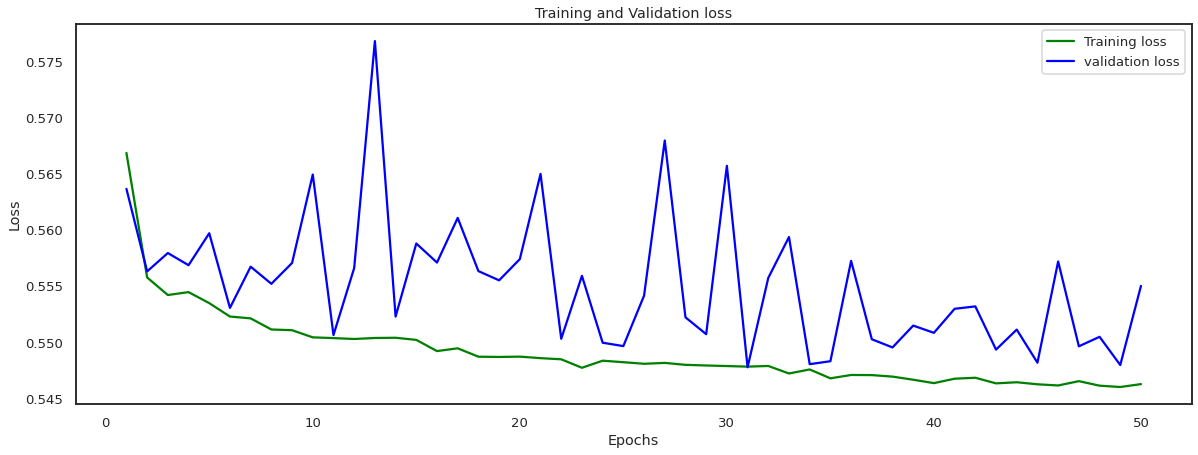

In [18]:
loss_train = fit.history['loss']
loss_val = fit.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

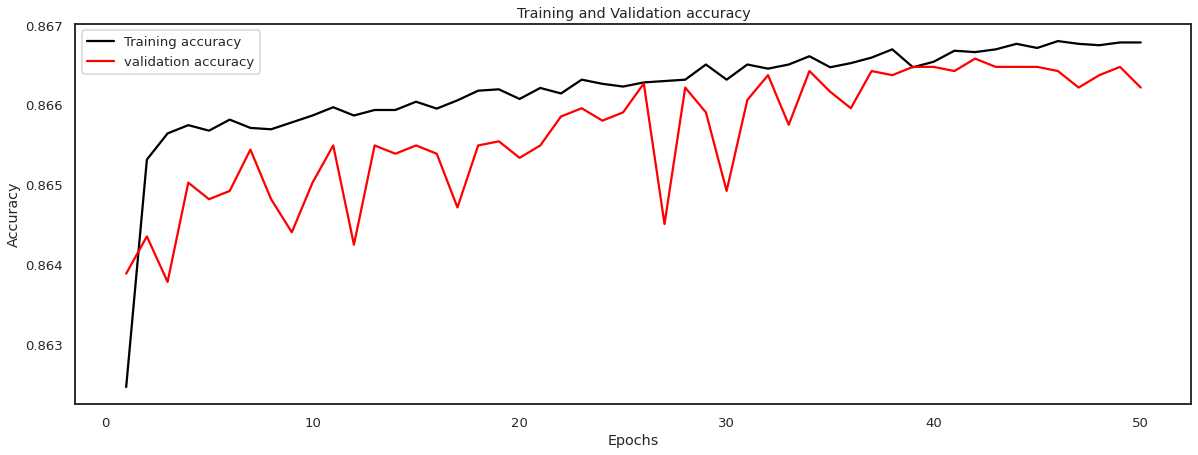

In [19]:
acc_train = fit.history['accuracy']
acc_val = fit.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, acc_train, 'k', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
eva_loss, eva_accu = nn.evaluate(x= x_test, y= y_test)

604/604 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.8640


In [21]:
print('Test_accuracy: ',eva_accu)
print('Test_loss: ',eva_loss)

Test_accuracy:  0.8639896512031555
Test_loss:  0.5577942728996277
